## || chapter 04. 분류 ||

### 01. 분류(Classification)의 개요
- 지도학습의 대표적인 유형 **분류**: 
     - 학습 데이터로 주어진 데이터의 피처와 레이블값을 ML알고리즘으로 학습해 모델 생성하고, 
     - 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것 
     
     => *즉, 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것*

### 02. 결정트리
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것
- 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음
- 높은 예측 정확도를 가지려면 결정 노드의 규칙이 정해져야함 -> **어떻게 트리를 분할할 것인가**
- 결정 노드 
    - 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다
    - 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 **정보 이득 지수**와 **계수**

#### * 결정트리 모델의 특징
- '균일도'룰을 기반으로 하고 있어 알고리즘이 쉽고 직관적
- but 과적합으로 정확도가 떨어짐
- **때문에 트리의 크기를 사전에 제한하는 것이 성능 튜닝에 도움된다**

#### * 결정트리 파라미터(DecisionTreeClassifier, DecisionTreeRegressor)
- min_samples_split: 노드 분할 위한 최소한의 샘플 데이터 수 -> *과적합 제어용. 디폴트2. 작게 설정할수록 과적합 가능성 증가*
- min_samples_leaf: 말단 노드가 되기 위한 최소한의 샘플 데이터 수 -> *과적합 제어용. *
- max_features: 최적 분할을 위해 고려할 최대 피처 개수 -> *디폴트None*
- max_depth: 트리의 최대 깊이 규정 -> *디폴트None. 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합되므로 제어필요*
- max_leaf_nodes: 말단 노드의 최대 개수

#### * 결정 트리 모델의 시각화
- Graphviz 패키지: 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [5]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,\
                feature_names = iris_data.feature_names, impurity=True, filled=True)

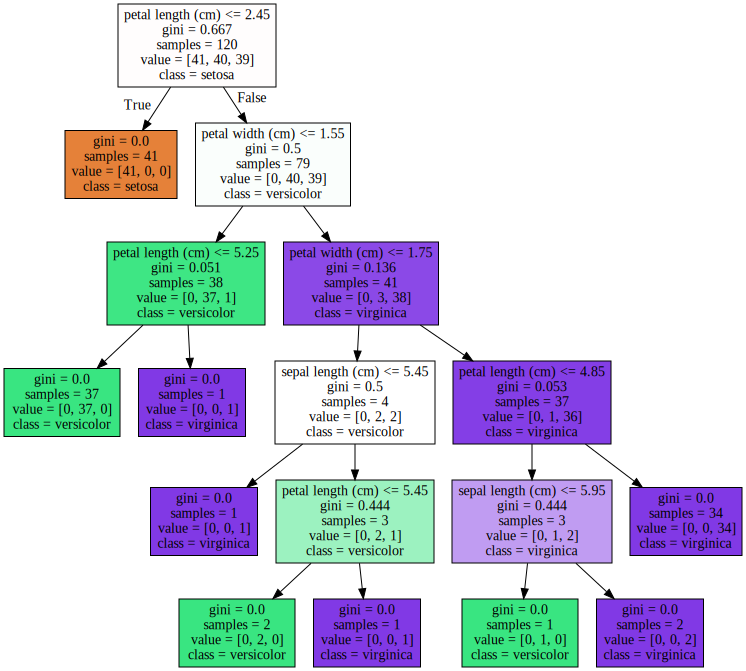

In [6]:
import graphviz

#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

##### 1)루트노트 기준 설명
- *petal length(cm)<=2.45: 이 규칙으로 자식 노드 생성*
- *gini=0.667: sample이 value 분포도로 되어있으니 지니 계수는 0.667*
- *samples=120: 전체 데이터 개수 120개*
- *value=[41,40,39]: Setosa 41, Versicolor 40, Virginica 39 구성*
- *class=setosa: 하위 노드를 가질 경우에 setosa의 개수가 41개로 제일 많다는 의미*

##### 2)각 노드의 색깔은 붓꽃 데이터의 레이블 값
- 주황색 0: Setosa
- 초록색 1: Versicolor
- 보라색 2: Virginica

##### 3)색깔 짙어질수록 지니 계수 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미

##### 4) 파라미터 변경에 따른 트리 변화
- max_depth 제한: 더 간단한 결정 트리
- min_samples_split=4: 남은 samples가 4보다 작아지면 더 이상 자식 규칙 노드를 위한 분할X -> 리프 노드 => 간결해짐
- min_samples_leaf<=n을 만족하면 리프 노드가 될 수 있음

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

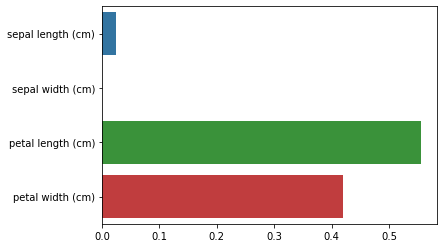

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

##### 피처의 중요한 역할 지표 feature_importances
- 값이 높을수록 해당 피처의 중요도가 높다는 의미

#### * 결정트리 과적합

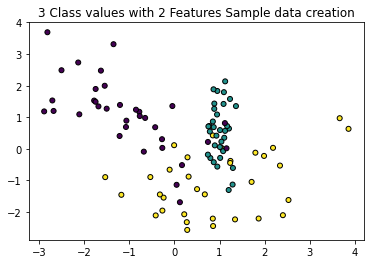

In [9]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,\
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

#### * 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [ ]:
import

### 03. 앙상블 학습

#### * 앙상블 학습 개요
- 앙상블 학습을 통한 분류: **여러개의 분류기**를 생성하고 그 **예측을 결합**함으로써 보다 정확한 최종 예측을 도출하는 기법
- 앙상블 학습의 목표: 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것
- 앙상블 학습의 유형: 보팅, 배깅, 부스팅..+스태깅 등

#### * 보팅 유형 - 하드보팅과 소프트보팅
- 하드보팅: 다수결 원칙과 비슷
    - 예측한 결과값들중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정
- 소프트 보팅: 분류기들의 레이블값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정
- 일반적으로 소프트 보팅이 보팅 방법으로 적용됨

### 04. 랜덤 포레스트

#### * 랜덤 포레스트의 개요 및 실습
- 배깅의 대표적인 알고리즘 - 랜덤 포레스트
- 배깅: 같은 알고리즘으로 여러 개의 분류기를 만들어 보팅으로 최종 결정하는 알고리즘
- 앙상블 알고리즘 중 비교적 빠른 수행 속도 가짐 & 다양한 영역에서 높은 예측 성능 & 결정 트리의 쉽고 직관적인 장점

- 랜덤 포레스트: 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정

#### * 랜덤 포레스트 하이퍼 파라미터 및 튜닝
- 단점: 하이퍼 파라미터가 너무 많고, 때문에 튜닝을 위한 시간이 많이 소모됨.

### 05. GBM(Gradient Boosting Machine)

#### * GBM의 개요 및 실습
- 부스팅 알고리즘: 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- 구현: AdaBppst, 그래디언트 부스트(GBM)
- GBM은 에이다부스트와 유사하나 가중치 업데이트를 경사 하강법을 이용하는 것이 큰 차이
- GBM이 랜덤 포레스트보다 나은 예측 성능을 보이는 경우가 많지만, 수행 시간이 오래걸리고 하이퍼 파라미터 튜닝 노력도 더 필요함

### 06. XGBoost(eXtra Gradient Boost)

#### * XGBoost 개요
- 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나
- 분류에 있어서 일반적으로 다른 머신러닝보다 뛰어난 예측 성능 나타냄
- GBM에 기반하고 있지만 GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제 해결해 매우 각광받고 있음
- 특히 병렬 CPU 환경에서 병렬 학습이 가능해 빠르게 학습 완료 가능

### 07. lightGBM

#### * lightGBM 개요
- 장점: XGBoost보다 학습에 걸리는 시간이 훨씬 적고 메모리 사용량도 상대적으로 적음
- 그러면서 예측 성능은 별다른 차이 없는데 기능상의 다양성은 lightGBM이 약간 더 많음

### 10. 스태킹 앙상블
- 스태깅: 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점에서 앞의 배깅&부스팅과 유사
- but, 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측 수행한다는 차이점.
     - 개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측 수행하는 방식
- 스태깅 모델은 두 종류의 모델 필요
     - 개별적인 기반 모델
     - 이 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 최종 메타 모델

### 11. 정리
- 대부분의 앙상블 기법은 결정 트리 기반의 다수의 약한 학습기를 결합해 변동성을 줄여 예측 오류를 줄이고 성능 개선


- **결정 트리**: 다른 알고리즘에 비해 비교적 직관적이어서 어떻게 예측 결과가 도출되었는지 과정 쉽게 알 수 있음
    - *단점: 트리가 깊어지고 복잡해지면 과적합 쉽게 발생*
    
    
    
- 앙상블 기법: 크게 배깅&부스팅
- **배깅**: 학습 데이터를 중복을 허용하면서 다수의 세트로 샘플링하여 이를 다수의 약한 학습기가 학습한 뒤 최종 결과를 결합해 예측
    - *랜덤 포레스트: 수행시간 빠르고 안정적인 예측 성능 제공*
- **부스팅**: 학습기들이 순차적으로 학습을 진행하면서 예측이 틀린 데이터에 대해서는 가중치를 부여해 다음번 학습기가 학습할 때에는 이전에 예측이 틀린 데이터에 대해서는 보다 높은 정확도로 예측할 수 있도록 해줌
    - *GBM: 뛰어난 예측성능. but 수행시간 너무 오래걸림*
    
    
    
- **XGBoost&lightGBM**: 현재 각광받고 있는 부스팅 기반 머신러닝 패키지
     - *lightGBM: XGBoost보다 빠른 학습 수행 시간 + 비슷한 예측 성능*
     
     
     
- **스태깅**: 여러 개의 개별 모델들이 생성한 예측 데이터를 기반으로 최종 메타 모델이 학습할 별도의 학습 데이터 세트와 예측할 테스트 데이터 세트를 재 생성하는 기법
     - *핵심: 메타 모델이 사용할 학습 데이터 세트와 예측 데이터 세트를 개별 모델의 예측 값들을 스태깅 형태로 결합해 생성하는데 있음*